In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Classified Data", index_col=0, sep=',', encoding='UTF-8')
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

,copy,True
,with_mean,True
,with_std,True


In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]], shape=(1000, 10))

In [10]:
#ahora como esta en un array es necesario llevar esto a un df legible para los algoritmos que utilizaremos

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) # --> menos la ultima que 
#es la variable a clasificar
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[165   8]
 [ 17 140]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       173
           1       0.95      0.89      0.92       157

    accuracy                           0.92       330
   macro avg       0.93      0.92      0.92       330
weighted avg       0.93      0.92      0.92       330



In [20]:
#Método del codo (Elbow Method), consiste en trazar la suma de las distancias al cuadrado entre 
# cada punto de datos y su centroide asignado para diferentes valores de k. En este método,
#  buscamos el valor de k donde la disminución en la suma de las distancias al cuadrado se 
# ralentiza y forma una curva similar a un codo

In [21]:
error_rate = []

In [22]:
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predic_i = knn.predict(X_test)
    error_rate.append(np.mean(predic_i!=y_test))

Text(0, 0.5, 'Error Rate')

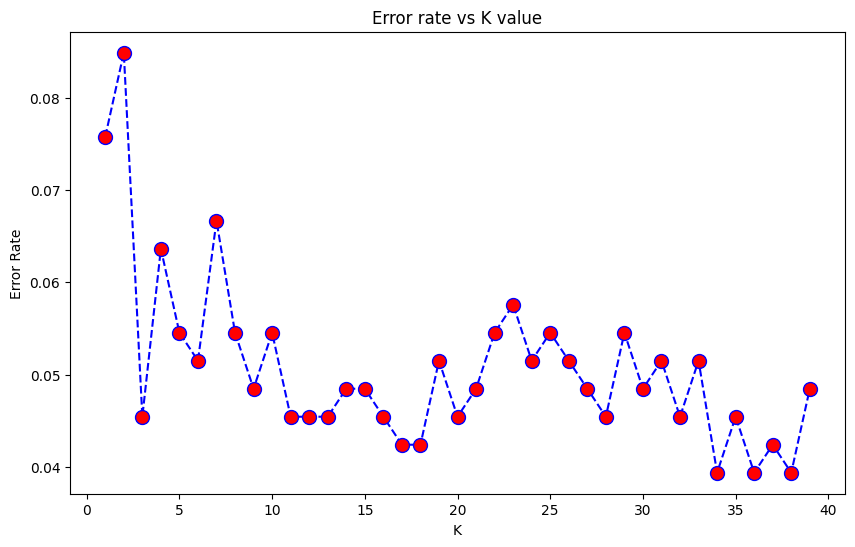

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='b', linestyle='dashed',
          marker='o', markerfacecolor= 'Red', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

como podemos ver que mientras mas vecinos le damos para que pueda decidir si pertenece a una clase o
no, el error disminuye mas, de esta manera podemos observar que tenermos por los 18 vecinos
que el error es bajo y que aunmentar la cantiadad de vecino para bajar un decima del error,
traeria sobreajustar el modelo

In [26]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[169   4]
 [ 10 147]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       173
           1       0.97      0.94      0.95       157

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [ ]:
# de esta manera podemos observa como la precision y el f1 subieron idicando 
# que k=18 seria lo mas optimo coste beneficio